## Trying the same keras.imdb dataset but this time with **RNNs**

In [1]:
from keras.models import Sequential
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

## Preparing the data

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Train out model

In [3]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 211ms/step - acc: 0.6185 - loss: 0.6422 - val_acc: 0.7892 - val_loss: 0.4656
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 224ms/step - acc: 0.8286 - loss: 0.3999 - val_acc: 0.6402 - val_loss: 1.0000
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 216ms/step - acc: 0.8591 - loss: 0.3472 - val_acc: 0.7740 - val_loss: 0.4607
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 213ms/step - acc: 0.8826 - loss: 0.2950 - val_acc: 0.8282 - val_loss: 0.3794
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 197ms/step - acc: 0.9170 - loss: 0.2230 - val_acc: 0.8470 - val_loss: 0.4406
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 191ms/step - acc: 0.9333 - loss: 0.1808 - val_acc: 0.8488 - val_loss: 0.3958
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 193ms/step - acc: 0.9588 - loss: 0.1221 - val_acc: 0.8076 - val_loss: 0.4874
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 199ms/step - acc: 0.9707 - loss: 0.0918 - val_acc: 0.8384 - val_loss: 0.4770
Epoch 9/10
157/157 ━━━━━━━━━━━━━

## plotting the outcome

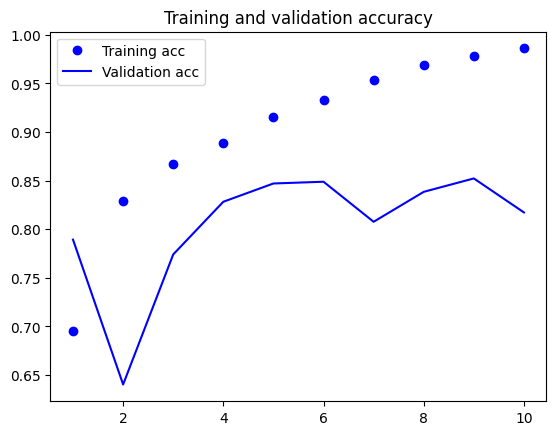

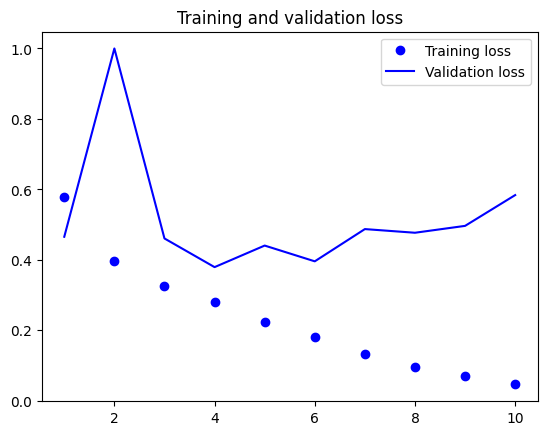

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()